**1. What is Hierarchical Clustering?**
  Hierarchical clustering builds a tree-like structure (dendrogram) that reveals how clusters form at different levels.
  There are two main types:

**Agglomerative Clustering (Bottom-Up):**
 Begins with each data point as its own cluster and iteratively merges the closest clusters until the desired cluster count is reached.
                                          **Divisive Clustering (Top-Down):**
 Starts with all data points in one cluster and recursively splits into smaller clusters.
Agglomerative clustering is more commonly used, although it has a quadratic computational cost (order n2), which can make it expensive for large datasets.

**MALL CUSTOMER SEGMENTATION**

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [15]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


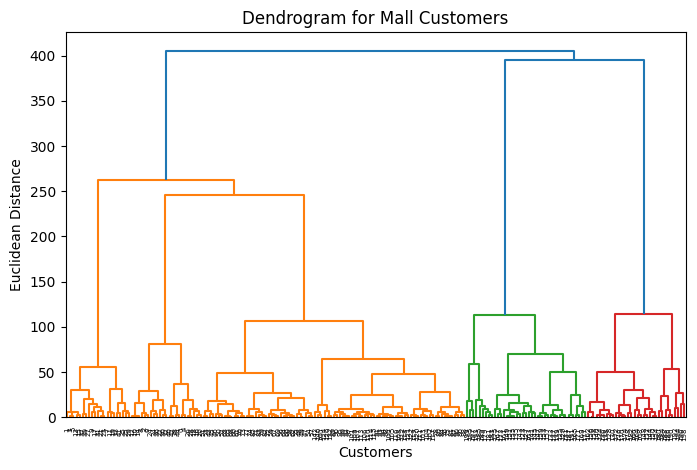

In [21]:
X = df.iloc[:, [3, 4]].values


plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Mall Customers")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)




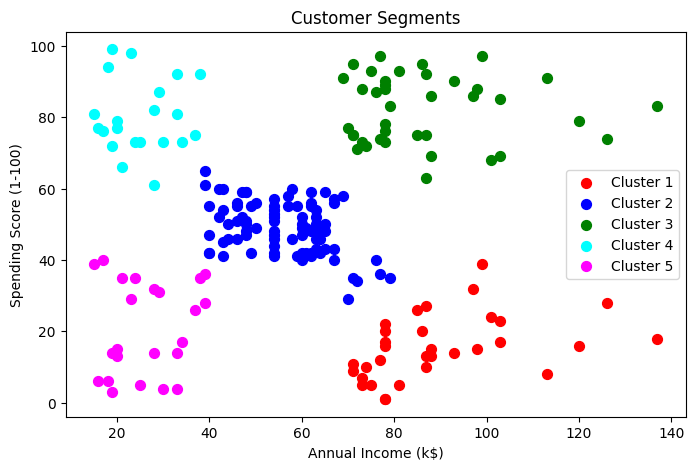

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
